In [7]:
import secrets
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [8]:
data_path = Path().resolve().parent / "data"

In [12]:
# Random seed
# secrets.randbits(128) # 208905213533139122735706682150229709525
rng = np.random.default_rng(208905213533139122735706682150229709525)
indices_train = rng.choice(5000, 500, replace=False)
indices_test = rng.choice(800, 100, replace=False)

In [13]:
# Create a dictionary where keys are the target digit and values are the images array sampled
train_list = []
for f in data_path.glob("train*.txt"):
    raw_data = np.loadtxt(f)[indices_train, :]
    target = raw_data[:, [0]]
    features = (raw_data[:, 1:] / raw_data[:, 1:].max(axis=1, keepdims=True)).astype(bool).astype(int)
    train_list.append(np.hstack((target, features)))
train_data = np.vstack(train_list)

In [14]:
# Create a dictionary where keys are the target digit and values are the images array sampled
test_list = []
for f in data_path.glob("test*.txt"):
    raw_data = np.loadtxt(f)[indices_test, :]
    target = raw_data[:, [0]]
    features = (raw_data[:, 1:] / raw_data[:, 1:].max(axis=1, keepdims=True)).astype(bool).astype(int)
    test_list.append(np.hstack((target, features)))
test_data = np.vstack(test_list)

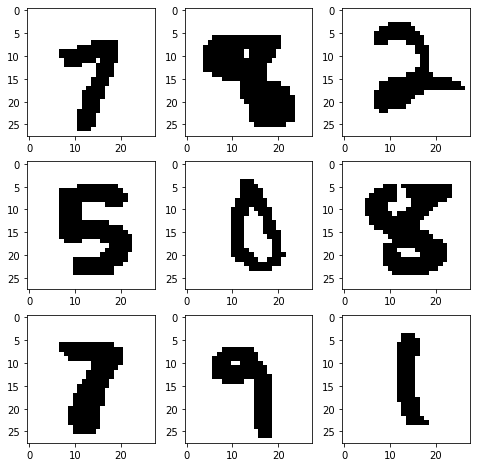

In [15]:
# Show a few examples of images
width, height = 28, 28
img_indices = rng.choice(train_data.shape[0], 9)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in zip(img_indices, axs.flatten()):
    sample_image = train_data[i, 1:].reshape(width, height)
    ax.imshow(sample_image, cmap=plt.cm.gray_r)
plt.show()

In [49]:
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

In [82]:
y_train_unique, y_train_count = np.unique(y_train, return_counts=True)
prob_v_dict = dict(zip(y_train_unique.astype(int), y_train_count / y_train.size))

m = 1
p = 1 / 2

prob_a_1_dict = {}
prob_a_0_dict = {}
for i in y_train_unique:
    X_train_target_i = X_train[y_train == i]
    prob_a_0_dict[i] = ((X_train_target_i == 0).sum(axis=0) + m * p) / (X_train_target_i.shape[0] + m)
    prob_a_1_dict[i] = ((X_train_target_i == 1).sum(axis=0) + m * p) / (X_train_target_i.shape[0] + m)

In [92]:
# j = 0
# X_test_j = X_test[j, :]
# y_test_j = y_test[j]

In [ ]:
np.empty()

In [97]:
y_pred = np.empty(shape=X_test.shape[0])
for j in range(X_test.shape[0]):
    X_test_j = X_test[j, :]
    prob_dict = {}
    for i in y_train_unique:
        prob_dict[i] = (
            prob_v_dict[i]
            * np.prod(prob_a_0_dict[i][X_test_j == 0])
            * np.prod(prob_a_1_dict[i][X_test_j == 1])
        )
    y_pred[j] = max(prob_dict, key=prob_dict.get)

In [98]:
y_pred

array([0., 0., 0., 0., 0., 8., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0.,
       0., 0., 6., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 8.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 5., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 8., 0., 0., 8., 0., 8., 0., 0., 5., 0., 0., 0., 0.,
       0., 5., 4., 0., 8., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 5., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 6., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 8., 2., 6., 2., 2., 2., 6.,
       2., 2., 8., 2., 2.